In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data(file_path, column_names):
    df = pd.read_csv(file_path, sep='\t', names=column_names)
    return df

In [3]:
polluters_info = load_data("content_polluters.txt", ["UserID", "CreatedAt", "CollectedAt", "NumberOfFollowings", "NumberOfFollowers", "NumberOfTweets", "LengthOfScreenName", "LengthOfDescriptionInUserProfile"])

legitimate_info = load_data("legitimate_users.txt", ["UserID", "CreatedAt", "CollectedAt", "NumberOfFollowings", "NumberOfFollowers", "NumberOfTweets", "LengthOfScreenName", "LengthOfDescriptionInUserProfile"])

polluters_followings = load_data("content_polluters_followings.txt", ["UserID", "FollowingsSeries"])

legitimate_followings = load_data("legitimate_users_followings.txt", ["UserID", "FollowingsSeries"])

polluters_tweets = load_data("content_polluters_tweets.txt", ["UserID", "TweetID", "Tweet", "TCreatedAt"])

legitimate_tweets = load_data("legitimate_users_tweets.txt", ["UserID", "TweetID", "Tweet", "TCreatedAt"])

In [4]:
polluters_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   UserID                            22223 non-null  int64 
 1   CreatedAt                         22223 non-null  object
 2   CollectedAt                       22223 non-null  object
 3   NumberOfFollowings                22223 non-null  int64 
 4   NumberOfFollowers                 22223 non-null  int64 
 5   NumberOfTweets                    22223 non-null  int64 
 6   LengthOfScreenName                22223 non-null  int64 
 7   LengthOfDescriptionInUserProfile  22223 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [5]:
polluters_info.head()

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile
0,6301,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132
1,10836,2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134
2,10997,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158
3,633293,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121
4,717883,2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70


In [6]:
polluters_info['CreatedAt'] = pd.to_datetime(polluters_info['CreatedAt'])
polluters_info['CollectedAt'] = pd.to_datetime(polluters_info['CollectedAt'])
polluters_info['AccountAge'] = (polluters_info['CollectedAt'] - polluters_info['CreatedAt']).dt.days

In [7]:
polluters_info['FollowersToFollowingsRatio'] = polluters_info['NumberOfFollowers'] / polluters_info['NumberOfFollowings']
polluters_info['AvgTweetsperDay'] = polluters_info['NumberOfTweets'] / polluters_info['AccountAge']

In [8]:
polluters_info.describe()

,UserID,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,AccountAge,FollowersToFollowingsRatio,AvgTweetsperDay
count,2.222300e+04,22223.000000,2.222300e+04,22223.000000,22223.000000,22223.000000,22223.000000,2.222000e+04,2.180300e+04
mean,9.158609e+07,2212.416775,2.308996e+03,1135.044548,11.283445,60.113981,151.410251,inf,inf
std,4.236440e+07,5376.689112,3.415880e+04,4301.928411,2.630156,54.093454,177.159579,NaN,NaN
min,6.301000e+03,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,5.912933e+07,326.500000,6.500000e+01,16.000000,9.000000,0.000000,16.000000,1.696043e-01,4.925922e-01
50%,9.993590e+07,874.000000,2.950000e+02,113.000000,11.000000,54.000000,80.000000,4.280436e-01,2.360000e+00
75%,1.225270e+08,1878.000000,1.224000e+03,636.000000,13.000000,104.000000,238.000000,8.919273e-01,1.033333e+01
max,1.737670e+08,109388.000000,4.309347e+06,148047.000000,15.000000,474.000000,1329.000000,inf,inf


In [9]:
polluters_followings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            22223 non-null  int64 
 1   FollowingsSeries  22223 non-null  object
dtypes: int64(1), object(1)
memory usage: 347.4+ KB


In [10]:
polluters_followings.head()

,UserID,FollowingsSeries
0,6301,"3269,3310,3339,3381,3351,3323,3305,3275,3245,3..."
1,10836,"1949,1963,1963,1963,1963,1963,1963,1962,1961,1..."
2,10997,"1119,1119,999,999,1050,1170,1071,799,799,799,8..."
3,633293,"2174,2651,2676,2674,2673,2673,2673,2672,2672,2..."
4,717883,"7731,7737,7737,7741,7741,7741,7740,7740,7749,7..."


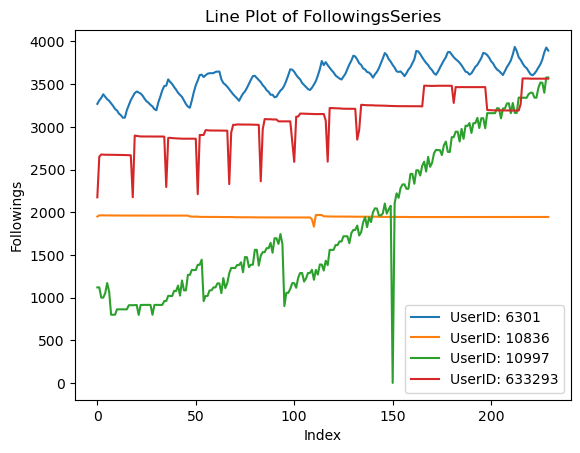

In [11]:
import matplotlib.pyplot as plt

polluters_followings['FollowingsSeries'] = polluters_followings['FollowingsSeries'].apply(lambda x: [int(i) for i in x.split(',')])

# Create a line plot for each user
for index, row in polluters_followings.iterrows():
    plt.plot(row['FollowingsSeries'], label=f"UserID: {row['UserID']}")
    if index == 3 :
        break

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Followings')
plt.title('Line Plot of FollowingsSeries')
plt.legend()
plt.show() 

In [12]:
polluters_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333691 entries, 0 to 2333690
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   UserID      int64 
 1   TweetID     int64 
 2   Tweet       object
 3   TCreatedAt  object
dtypes: int64(2), object(2)
memory usage: 71.2+ MB


In [13]:
polluters_tweets.head()

,UserID,TweetID,Tweet,TCreatedAt
0,6301,5599519501,MELBOURNE ENQUIRY: Seeking a variety of acts f...,2009-11-10 15:14:31
1,6301,5600313663,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:05
2,6301,5600328557,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:40
3,6301,5600338093,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:47:03
4,6301,5600564863,"Come to ""The Burlesque Bootcamp - Sydney"" Satu...",2009-11-10 15:56:03


In [14]:
import re

In [15]:
def mentions(tweet):
    if pd.isna(tweet) :
        return 0
    
    mentions = re.findall(r'@\w+', tweet)
    return len(mentions)

In [16]:
def hashtags(tweet) :
    if pd.isna(tweet) :
        return 0
    hashtags = re.findall(r'#\w+', tweet)
    return len(hashtags)

In [17]:
def numberofURLs(tweet) :
    if pd.isna(tweet) :
        return 0
    links = re.findall(r'https?://\S+', tweet)
    return len(links)

In [18]:
def wordscount(tweet) :
    if pd.isna(tweet) :
        return 0
    words = re.findall(r'\b\w+\b', tweet)
    return len(words)

In [19]:
polluters_tweets['NumWords'] = polluters_tweets['Tweet'].apply(wordscount)
polluters_tweets['NumMentions'] = polluters_tweets['Tweet'].apply(mentions)

In [20]:
polluters_tweets['NumHashtags'] = polluters_tweets['Tweet'].apply(hashtags)
polluters_tweets['NumLinks'] = polluters_tweets['Tweet'].apply(numberofURLs)

In [21]:
polluters_user_stats = polluters_tweets.groupby('UserID').agg({
    'NumWords': 'mean',
    'NumMentions': 'mean',
    'NumHashtags': 'mean',
    'NumLinks': 'mean'
}).reset_index()
polluters_user_stats

,UserID,NumWords,NumMentions,NumHashtags,NumLinks
0,6301,15.420000,0.335000,0.090000,0.705000
1,10836,13.343434,0.272727,0.510101,0.656566
2,10997,16.944162,0.553299,0.664975,0.269036
3,633293,13.450000,0.445000,0.095000,0.320000
4,717883,18.470000,0.105000,0.010000,0.690000
...,...,...,...,...,...
20640,173715049,16.724138,4.482759,0.000000,1.000000
20641,173718053,16.857143,4.000000,0.000000,1.000000
20642,173721018,16.523810,5.000000,0.000000,1.000000
20643,173723395,16.294118,4.000000,0.000000,1.000000


In [22]:
polluters_user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserID       20645 non-null  int64  
 1   NumWords     20645 non-null  float64
 2   NumMentions  20645 non-null  float64
 3   NumHashtags  20645 non-null  float64
 4   NumLinks     20645 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 806.6 KB


In [23]:
merged_df = pd.merge(polluters_info, polluters_followings, on='UserID', how='inner')
polluters = pd.merge(merged_df, polluters_user_stats, on='UserID', how='inner')

In [24]:
polluters.shape

(20645, 16)

In [25]:
polluters.head()

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,AccountAge,FollowersToFollowingsRatio,AvgTweetsperDay,FollowingsSeries,NumWords,NumMentions,NumHashtags,NumLinks
0,6301,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,1217,0.939431,0.707477,"[3269, 3310, 3339, 3381, 3351, 3323, 3305, 327...",15.420000,0.335000,0.090000,0.705000
1,10836,2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,1329,0.406875,0.170053,"[1949, 1963, 1963, 1963, 1963, 1963, 1963, 196...",13.343434,0.272727,0.510101,0.656566
2,10997,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,1272,8.618409,30.404088,"[1119, 1119, 999, 999, 1050, 1170, 1071, 799, ...",16.944162,0.553299,0.664975,0.269036
3,633293,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,1105,2.773229,11.509502,"[2174, 2651, 2676, 2674, 2673, 2673, 2673, 267...",13.450000,0.445000,0.095000,0.320000
4,717883,2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,1105,0.909197,0.790045,"[7731, 7737, 7737, 7741, 7741, 7741, 7740, 774...",18.470000,0.105000,0.010000,0.690000


In [26]:
legitimate_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19276 entries, 0 to 19275
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   UserID                            19276 non-null  int64 
 1   CreatedAt                         19276 non-null  object
 2   CollectedAt                       19276 non-null  object
 3   NumberOfFollowings                19276 non-null  int64 
 4   NumberOfFollowers                 19276 non-null  int64 
 5   NumberOfTweets                    19276 non-null  int64 
 6   LengthOfScreenName                19276 non-null  int64 
 7   LengthOfDescriptionInUserProfile  19276 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.2+ MB


In [27]:
legitimate_info.head()

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile
0,614,2006-07-13 15:30:05,2009-11-20 23:56:21,510,350,3265,10,34
1,1038,2006-07-15 16:12:15,2009-11-16 05:12:11,304,443,4405,7,156
2,1437,2006-07-16 12:29:24,2009-11-16 16:25:12,45,73,725,6,37
3,2615,2006-07-19 23:23:55,2009-11-27 18:34:36,211,230,211,7,0
4,3148,2006-07-26 14:17:22,2009-11-20 17:35:18,7346,7244,11438,8,97


In [28]:
legitimate_info['CreatedAt'] = pd.to_datetime(legitimate_info['CreatedAt'])
legitimate_info['CollectedAt'] = pd.to_datetime(legitimate_info['CollectedAt'])
legitimate_info['AccountAge'] = (legitimate_info['CollectedAt'] - legitimate_info['CreatedAt']).dt.days
legitimate_info['FollowersToFollowingsRatio'] = legitimate_info['NumberOfFollowers'] / legitimate_info['NumberOfFollowings']
legitimate_info['AvgTweetsperDay'] = legitimate_info['NumberOfTweets'] / legitimate_info['AccountAge']

In [29]:
legitimate_info.isna().sum()

UserID                               0
CreatedAt                            0
CollectedAt                          0
NumberOfFollowings                   0
NumberOfFollowers                    0
NumberOfTweets                       0
LengthOfScreenName                   0
LengthOfDescriptionInUserProfile     0
AccountAge                           0
FollowersToFollowingsRatio          83
AvgTweetsperDay                      3
dtype: int64

In [30]:
legitimate_followings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19276 entries, 0 to 19275
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   UserID            19276 non-null  int64 
 1   FollowingsSeries  19276 non-null  object
dtypes: int64(1), object(1)
memory usage: 301.3+ KB


In [31]:
legitimate_followings.head()

,UserID,FollowingsSeries
0,614,"664,664,664,665,665,665,665,665,665,665,665,66..."
1,1038,"378,378,378,378,378,378,378,378,378,378,378,37..."
2,1437,"59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,5..."
3,2615,"262,262,262,262,262,262,262,262,262,262,264,26..."
4,3148,"5238,5238,5238,5238,5238,5238,5238,5238,5238,5..."


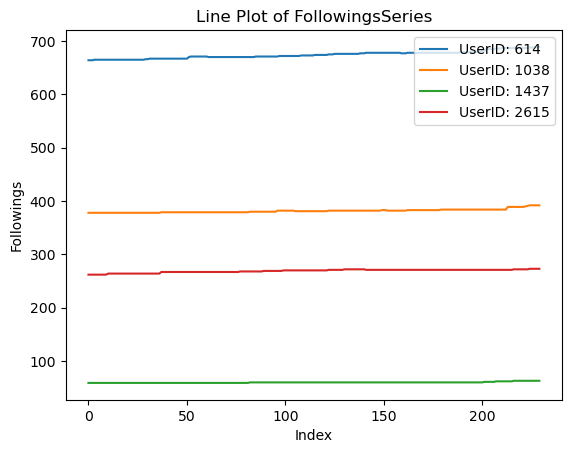

In [32]:
legitimate_followings['FollowingsSeries'] = legitimate_followings['FollowingsSeries'].apply(lambda x: [int(i) for i in x.split(',')])

# Create a line plot for each user
for index, row in legitimate_followings.iterrows():
    plt.plot(row['FollowingsSeries'], label=f"UserID: {row['UserID']}")
    if index == 3 :
        break

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Followings')
plt.title('Line Plot of FollowingsSeries')
plt.legend()
plt.show() 

In [33]:
legitimate_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246377 entries, 0 to 3246376
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   UserID      int64 
 1   TweetID     int64 
 2   Tweet       object
 3   TCreatedAt  object
dtypes: int64(2), object(2)
memory usage: 99.1+ MB


In [34]:
legitimate_tweets.head()

,UserID,TweetID,Tweet,TCreatedAt
0,614,5912305459,… at house party in Daybreak. Not as weird as ...,2009-11-20 23:52:52
1,614,5908467165,Taxiing — at SLC Salt Lake City International...,2009-11-20 20:42:48
2,614,5904901963,Almost home! — at PDX Portland International ...,2009-11-20 18:11:01
3,614,5900351610,Lunch! — at Ten01 http://gowal.la/s/Awa,2009-11-20 15:04:42
4,614,5900312627,Mm … books — at @Powells http://gowal.la/s/6fe,2009-11-20 15:03:06


In [35]:
legitimate_tweets['NumWords'] = legitimate_tweets['Tweet'].apply(wordscount)
legitimate_tweets['NumMentions'] = legitimate_tweets['Tweet'].apply(mentions)
legitimate_tweets['NumHashtags'] = legitimate_tweets['Tweet'].apply(hashtags)
legitimate_tweets['NumLinks'] = legitimate_tweets['Tweet'].apply(numberofURLs)

In [36]:
legitimate_user_stats = legitimate_tweets.groupby('UserID').agg({
    'NumWords': 'mean',
    'NumMentions': 'mean',
    'NumHashtags': 'mean',
    'NumLinks': 'mean'
}).reset_index()
legitimate_user_stats

,UserID,NumWords,NumMentions,NumHashtags,NumLinks
0,614,11.715000,0.590000,0.005000,0.31000
1,1038,13.720000,0.810000,0.175000,0.27500
2,1437,13.975000,0.650000,0.220000,0.09500
3,2615,13.430000,0.380000,0.015000,0.13500
4,3148,12.592965,0.728643,0.095477,0.58794
...,...,...,...,...,...
19246,93390990,8.200000,0.000000,0.800000,0.80000
19247,93402679,2.000000,0.000000,0.000000,0.00000
19248,93419256,3.000000,0.000000,0.000000,0.00000
19249,93426370,18.000000,0.000000,0.000000,0.00000


In [37]:
legitimate_user_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19251 entries, 0 to 19250
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UserID       19251 non-null  int64  
 1   NumWords     19251 non-null  float64
 2   NumMentions  19251 non-null  float64
 3   NumHashtags  19251 non-null  float64
 4   NumLinks     19251 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 752.1 KB


In [38]:
merged_df = pd.merge(legitimate_info, legitimate_followings, on='UserID', how='inner')
legitimate = pd.merge(merged_df, legitimate_user_stats, on='UserID', how='inner')

In [39]:
legitimate.head()

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,AccountAge,FollowersToFollowingsRatio,AvgTweetsperDay,FollowingsSeries,NumWords,NumMentions,NumHashtags,NumLinks
0,614,2006-07-13 15:30:05,2009-11-20 23:56:21,510,350,3265,10,34,1226,0.686275,2.663132,"[664, 664, 664, 665, 665, 665, 665, 665, 665, ...",11.715000,0.590000,0.005000,0.31000
1,1038,2006-07-15 16:12:15,2009-11-16 05:12:11,304,443,4405,7,156,1219,1.457237,3.613618,"[378, 378, 378, 378, 378, 378, 378, 378, 378, ...",13.720000,0.810000,0.175000,0.27500
2,1437,2006-07-16 12:29:24,2009-11-16 16:25:12,45,73,725,6,37,1219,1.622222,0.594750,"[59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 5...",13.975000,0.650000,0.220000,0.09500
3,2615,2006-07-19 23:23:55,2009-11-27 18:34:36,211,230,211,7,0,1226,1.090047,0.172104,"[262, 262, 262, 262, 262, 262, 262, 262, 262, ...",13.430000,0.380000,0.015000,0.13500
4,3148,2006-07-26 14:17:22,2009-11-20 17:35:18,7346,7244,11438,8,97,1213,0.986115,9.429514,"[5238, 5238, 5238, 5238, 5238, 5238, 5238, 523...",12.592965,0.728643,0.095477,0.58794


In [40]:
legitimate.shape

(19251, 16)

In [41]:
polluters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20645 entries, 0 to 20644
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   UserID                            20645 non-null  int64         
 1   CreatedAt                         20645 non-null  datetime64[ns]
 2   CollectedAt                       20645 non-null  datetime64[ns]
 3   NumberOfFollowings                20645 non-null  int64         
 4   NumberOfFollowers                 20645 non-null  int64         
 5   NumberOfTweets                    20645 non-null  int64         
 6   LengthOfScreenName                20645 non-null  int64         
 7   LengthOfDescriptionInUserProfile  20645 non-null  int64         
 8   AccountAge                        20645 non-null  int64         
 9   FollowersToFollowingsRatio        20642 non-null  float64       
 10  AvgTweetsperDay                   20645 non-nu

In [42]:
legitimate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19251 entries, 0 to 19250
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   UserID                            19251 non-null  int64         
 1   CreatedAt                         19251 non-null  datetime64[ns]
 2   CollectedAt                       19251 non-null  datetime64[ns]
 3   NumberOfFollowings                19251 non-null  int64         
 4   NumberOfFollowers                 19251 non-null  int64         
 5   NumberOfTweets                    19251 non-null  int64         
 6   LengthOfScreenName                19251 non-null  int64         
 7   LengthOfDescriptionInUserProfile  19251 non-null  int64         
 8   AccountAge                        19251 non-null  int64         
 9   FollowersToFollowingsRatio        19169 non-null  float64       
 10  AvgTweetsperDay                   19251 non-nu

In [43]:
polluters['spammer'] = 1
legitimate['spammer'] = 0

In [44]:
df = pd.concat([polluters, legitimate], ignore_index=True)
df.head()

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,AccountAge,FollowersToFollowingsRatio,AvgTweetsperDay,FollowingsSeries,NumWords,NumMentions,NumHashtags,NumLinks,spammer
0,6301,2006-09-18 01:07:50,2010-01-17 20:38:25,3269,3071,861,8,132,1217,0.939431,0.707477,"[3269, 3310, 3339, 3381, 3351, 3323, 3305, 327...",15.420000,0.335000,0.090000,0.705000,1
1,10836,2006-10-27 14:38:04,2010-06-18 03:35:34,1949,793,226,9,134,1329,0.406875,0.170053,"[1949, 1963, 1963, 1963, 1963, 1963, 1963, 196...",13.343434,0.272727,0.510101,0.656566,1
2,10997,2006-10-29 09:50:38,2010-04-24 01:12:40,1119,9644,38674,12,158,1272,8.618409,30.404088,"[1119, 1119, 999, 999, 1050, 1170, 1071, 799, ...",16.944162,0.553299,0.664975,0.269036,1
3,633293,2007-01-14 12:40:10,2010-01-24 11:59:38,2174,6029,12718,11,121,1105,2.773229,11.509502,"[2174, 2651, 2676, 2674, 2673, 2673, 2673, 267...",13.450000,0.445000,0.095000,0.320000,1
4,717883,2007-01-27 22:14:18,2010-02-06 06:25:58,7731,7029,873,6,70,1105,0.909197,0.790045,"[7731, 7737, 7737, 7741, 7741, 7741, 7740, 774...",18.470000,0.105000,0.010000,0.690000,1


In [45]:
df.shape

(39896, 17)

In [46]:
df.isna().sum()

UserID                               0
CreatedAt                            0
CollectedAt                          0
NumberOfFollowings                   0
NumberOfFollowers                    0
NumberOfTweets                       0
LengthOfScreenName                   0
LengthOfDescriptionInUserProfile     0
AccountAge                           0
FollowersToFollowingsRatio          85
AvgTweetsperDay                      0
FollowingsSeries                     0
NumWords                             0
NumMentions                          0
NumHashtags                          0
NumLinks                             0
spammer                              0
dtype: int64

In [47]:
df.FollowersToFollowingsRatio

0        0.939431
1        0.406875
2        8.618409
3        2.773229
4        0.909197
           ...   
39891    0.000000
39892    0.050000
39893         NaN
39894    0.050000
39895    0.000000
Name: FollowersToFollowingsRatio, Length: 39896, dtype: float64

In [48]:
df.dropna(inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39811 entries, 0 to 39895
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   UserID                            39811 non-null  int64         
 1   CreatedAt                         39811 non-null  datetime64[ns]
 2   CollectedAt                       39811 non-null  datetime64[ns]
 3   NumberOfFollowings                39811 non-null  int64         
 4   NumberOfFollowers                 39811 non-null  int64         
 5   NumberOfTweets                    39811 non-null  int64         
 6   LengthOfScreenName                39811 non-null  int64         
 7   LengthOfDescriptionInUserProfile  39811 non-null  int64         
 8   AccountAge                        39811 non-null  int64         
 9   FollowersToFollowingsRatio        39811 non-null  float64       
 10  AvgTweetsperDay                   39811 non-nu

In [50]:
import matplotlib.pyplot as plt

In [51]:
spam = df['spammer'].value_counts()
spam.values

array([20642, 19169], dtype=int64)

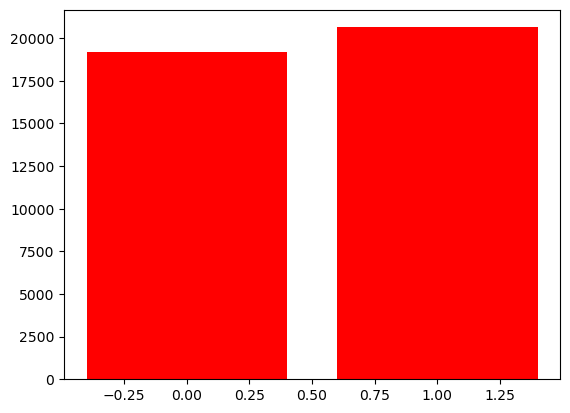

In [52]:
plt.bar(spam.index, spam.values, color ='red')
plt.show()

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39811 entries, 0 to 39895
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   UserID                            39811 non-null  int64         
 1   CreatedAt                         39811 non-null  datetime64[ns]
 2   CollectedAt                       39811 non-null  datetime64[ns]
 3   NumberOfFollowings                39811 non-null  int64         
 4   NumberOfFollowers                 39811 non-null  int64         
 5   NumberOfTweets                    39811 non-null  int64         
 6   LengthOfScreenName                39811 non-null  int64         
 7   LengthOfDescriptionInUserProfile  39811 non-null  int64         
 8   AccountAge                        39811 non-null  int64         
 9   FollowersToFollowingsRatio        39811 non-null  float64       
 10  AvgTweetsperDay                   39811 non-nu

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [67]:
df.to_csv('twitter_spammer.csv', index = False)

In [55]:
X = df.drop(['UserID', 'CreatedAt', 'CollectedAt', 'FollowingsSeries', 'spammer'], axis=1)
y = df['spammer']

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39811 entries, 0 to 39895
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   NumberOfFollowings                39811 non-null  int64  
 1   NumberOfFollowers                 39811 non-null  int64  
 2   NumberOfTweets                    39811 non-null  int64  
 3   LengthOfScreenName                39811 non-null  int64  
 4   LengthOfDescriptionInUserProfile  39811 non-null  int64  
 5   AccountAge                        39811 non-null  int64  
 6   FollowersToFollowingsRatio        39811 non-null  float64
 7   AvgTweetsperDay                   39811 non-null  float64
 8   NumWords                          39811 non-null  float64
 9   NumMentions                       39811 non-null  float64
 10  NumHashtags                       39811 non-null  float64
 11  NumLinks                          39811 non-null  float64
dtypes: f

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
print(X_train.isin([np.inf, -np.inf, np.nan]).sum())

NumberOfFollowings                    0
NumberOfFollowers                     0
NumberOfTweets                        0
LengthOfScreenName                    0
LengthOfDescriptionInUserProfile      0
AccountAge                            0
FollowersToFollowingsRatio          290
AvgTweetsperDay                     881
NumWords                              0
NumMentions                           0
NumHashtags                           0
NumLinks                              0
dtype: int64


In [59]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
y_train = y_train.loc[X_train.index].reset_index(drop=True)

In [60]:
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
y_test = y_test.loc[X_test.index].reset_index(drop=True)

In [61]:
print(X_train.isin([np.inf, -np.inf, np.nan]).sum())

NumberOfFollowings                  0
NumberOfFollowers                   0
NumberOfTweets                      0
LengthOfScreenName                  0
LengthOfDescriptionInUserProfile    0
AccountAge                          0
FollowersToFollowingsRatio          0
AvgTweetsperDay                     0
NumWords                            0
NumMentions                         0
NumHashtags                         0
NumLinks                            0
dtype: int64


In [74]:
df['NumHashtags'].mean(), df['NumMentions'].mean(), df['NumWords'].mean()

(0.1421296670167871, 0.3618400354716109, 14.497286012555257)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8591677503250975


In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred = random_forest_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [65]:
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.9222366710013004


In [68]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train_scaled, y_train)
y_val_pred_adaboost = adaboost_classifier.predict(X_test_scaled)

accuracy_adaboost = accuracy_score(y_test, y_val_pred_adaboost)
print("AdaBoost Validation Accuracy: {:.2f}%".format(accuracy_adaboost * 100))


AdaBoost Validation Accuracy: 91.24%


In [67]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
X_train.head()

,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,AccountAge,FollowersToFollowingsRatio,AvgTweetsperDay,NumWords,NumMentions,NumHashtags,NumLinks
4669,656,894,1024,11,159,284,1.362805,3.605634,22.041237,0.072165,0.474227,0.974227
27024,90,15,77,9,0,239,0.166667,0.322176,16.155844,0.415584,0.000000,0.000000
16250,702,290,544,8,0,11,0.413105,49.454545,19.385000,0.000000,0.000000,1.000000
7974,4572,4213,524,9,48,76,0.921479,6.894737,14.305000,0.015000,0.000000,0.980000
631,1920,1170,688,6,49,511,0.609375,1.346380,21.655000,0.000000,0.000000,0.995000


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [151]:
# Define the model
cnn_model = Sequential()
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(12, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# Set up TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
cnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/10
768/768 [==============================] - 6s 6ms/step - loss: 1.8158 - accuracy: 0.8328 - val_loss: 0.4309 - val_accuracy: 0.8739
Epoch 2/10
768/768 [==============================] - 4s 5ms/step - loss: 0.4814 - accuracy: 0.8527 - val_loss: 0.3807 - val_accuracy: 0.8788
Epoch 3/10
768/768 [==============================] - 4s 5ms/step - loss: 0.4157 - accuracy: 0.8529 - val_loss: 0.3449 - val_accuracy: 0.8750
Epoch 4/10
768/768 [==============================] - 4s 5ms/step - loss: 0.3845 - accuracy: 0.8549 - val_loss: 0.3282 - val_accuracy: 0.8868
Epoch 5/10
768/768 [==============================] - 4s 5ms/step - loss: 0.6024 - accuracy: 0.8188 - val_loss: 0.5210 - val_accuracy: 0.7377
Epoch 6/10
768/768 [==============================] - 4s 5ms/step - loss: 0.4526 - accuracy: 0.8002 - val_loss: 0.5103 - val_accuracy: 0.7537
Epoch 7/10
768/768 [==============================] - 4s 5ms/step - loss: 0.4407 - accuracy: 0.8201 - val_loss: 0.3522 - val_accuracy: 0.8703
Epoch 

In [152]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
# Make predictions
y_pred = cnn_model.predict(X_test_reshaped)
# Assuming binary classification
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Assuming y_test is available
cnn_accuracy = accuracy_score(y_test, y_pred_binary)
cnn_precision = precision_score(y_test, y_pred_binary)
cnn_recall = recall_score(y_test, y_pred_binary)
cnn_f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {cnn_accuracy:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print(f"F1 Score: {cnn_f1:.4f}")

241/241 [==============================] - 1s 2ms/step
Accuracy: 0.8559
Precision: 0.8818
Recall: 0.8340
F1 Score: 0.8572


In [153]:
dense_layer_weights = cnn_model.layers[-3].get_weights()[0]  # Assuming the first dense layer is the one with 128 units
importance_scores = np.sum(np.abs(dense_layer_weights), axis=1)
normalized_importance_scores = importance_scores / np.sum(importance_scores)
normalized_importance_scores

array([0.040785  , 0.03338746, 0.03296051, 0.03296519, 0.03167849,
       0.03003085, 0.02756612, 0.03274633, 0.0288048 , 0.02972347,
       0.02781208, 0.02965456, 0.03042024, 0.02940329, 0.03146511,
       0.03347672, 0.03407453, 0.031991  , 0.03210624, 0.03705796,
       0.03244171, 0.03099602, 0.02995115, 0.02586961, 0.02953073,
       0.03178074, 0.03023173, 0.03041287, 0.03152823, 0.03031016,
       0.0294516 , 0.0293855 ], dtype=float32)

In [154]:
len(normalized_importance_scores)

32

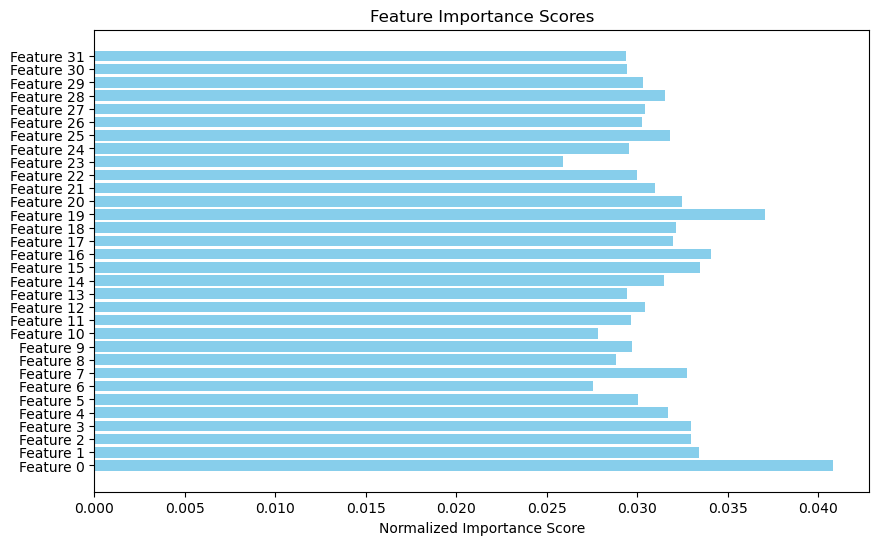

In [155]:
import matplotlib.pyplot as plt

# Assuming you've calculated normalized_importance_scores as described earlier

# Get the feature names (adjust this based on your data)
feature_names = [f'Feature {i}' for i in range(len(normalized_importance_scores))]

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(feature_names, normalized_importance_scores, color='skyblue')
plt.xlabel('Normalized Importance Score')
plt.title('Feature Importance Scores')
plt.show()


In [156]:
x_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
evaluation = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1]}")

241/241 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.8559
Test Accuracy: 0.8559167981147766


In [157]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Define the model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# Set up TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])


Epoch 1/10
768/768 [==============================] - 12s 12ms/step - loss: 1.7279 - accuracy: 0.6954 - val_loss: 0.6897 - val_accuracy: 0.7084
Epoch 2/10
768/768 [==============================] - 7s 10ms/step - loss: 0.8746 - accuracy: 0.7434 - val_loss: 1.8773 - val_accuracy: 0.7087
Epoch 3/10
768/768 [==============================] - 7s 10ms/step - loss: 0.7590 - accuracy: 0.7341 - val_loss: 0.5210 - val_accuracy: 0.7515
Epoch 4/10
768/768 [==============================] - 8s 10ms/step - loss: 0.5404 - accuracy: 0.7827 - val_loss: 0.4872 - val_accuracy: 0.8065
Epoch 5/10
768/768 [==============================] - 7s 10ms/step - loss: 0.5147 - accuracy: 0.8057 - val_loss: 0.4353 - val_accuracy: 0.8247
Epoch 6/10
768/768 [==============================] - 7s 10ms/step - loss: 0.4992 - accuracy: 0.8196 - val_loss: 0.4818 - val_accuracy: 0.8128
Epoch 7/10
768/768 [==============================] - 7s 9ms/step - loss: 0.4658 - accuracy: 0.8354 - val_loss: 0.4531 - val_accuracy: 0.8306

In [158]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
# Make predictions
y_pred = lstm_model.predict(X_test_reshaped)
# Assuming binary classification
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Assuming y_test is available
lstm_accuracy = accuracy_score(y_test, y_pred_binary)
lstm_precision = precision_score(y_test, y_pred_binary)
lstm_recall = recall_score(y_test, y_pred_binary)
lstm_f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {lstm_accuracy:.4f}")
print(f"Precision: {lstm_precision:.4f}")
print(f"Recall: {lstm_recall:.4f}")
print(f"F1 Score: {lstm_f1:.4f}")


241/241 [==============================] - 1s 4ms/step
Accuracy: 0.8256
Precision: 0.8611
Recall: 0.7914
F1 Score: 0.8248


In [159]:
x_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
evaluation = lstm_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1]}")

241/241 [==============================] - 1s 4ms/step - loss: 0.4409 - accuracy: 0.8256
Test Accuracy: 0.8256176710128784


In [160]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import TensorBoard
import datetime

In [161]:
# Define the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# Set up TensorBoard
log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model with TensorBoard callback
rnn_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/10
768/768 [==============================] - 7s 6ms/step - loss: 0.4626 - accuracy: 0.8303 - val_loss: 0.4011 - val_accuracy: 0.8772
Epoch 2/10
768/768 [==============================] - 4s 6ms/step - loss: 0.3393 - accuracy: 0.8810 - val_loss: 0.3222 - val_accuracy: 0.8822
Epoch 3/10
768/768 [==============================] - 4s 6ms/step - loss: 0.3230 - accuracy: 0.8783 - val_loss: 0.4112 - val_accuracy: 0.8304
Epoch 4/10
768/768 [==============================] - 4s 6ms/step - loss: 0.3232 - accuracy: 0.8782 - val_loss: 0.2805 - val_accuracy: 0.9008
Epoch 5/10
768/768 [==============================] - 4s 6ms/step - loss: 0.2823 - accuracy: 0.8927 - val_loss: 0.2564 - val_accuracy: 0.9027
Epoch 6/10
768/768 [==============================] - 4s 6ms/step - loss: 0.2661 - accuracy: 0.8997 - val_loss: 0.2727 - val_accuracy: 0.8978
Epoch 7/10
768/768 [==============================] - 4s 6ms/step - loss: 0.2560 - accuracy: 0.9051 - val_loss: 0.2442 - val_accuracy: 0.9066
Epoch 

In [175]:
pip install innvestigate

  Obtaining dependency information for innvestigate from https://files.pythonhosted.org/packages/03/17/7f5422df077c01b0c8740e91a424267891907328419bf4e3961280dc3095/innvestigate-2.1.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/66.8 kB ? eta -:--:--
   ------ --------------------------------- 10.2/66.8 kB ? eta -:--:--
   ------ --------------------------------- 10.2/66.8 kB ? eta -:--:--
   ------------------ --------------------- 30.7/66.8 kB 163.8 kB/s eta 0:00:01
   ------------------ --------------------- 30.7/66.8 kB 163.8 kB/s eta 0:00:01
   ------------------ --------------------- 30.7/66.8 kB 163.8 kB/s eta 0:00:01
   ------------------ --------------------- 30.7/66.8 kB 163.8 kB/s eta 0:00:01
   ------------------ --------------------- 30.7/66.8 kB 163.8 kB/s eta 0:00:01
   ------------------------ --------------- 41.0/66.8 kB 81.9 kB/s eta 0:00:01
   ---------------------------

In [179]:
rnn_weights = rnn_model.get_layer('simple_rnn_4').get_weights()[0]
for layer in rnn_model.layers:
    print(layer.name)


simple_rnn_4
dense_21
dense_22


In [186]:
rnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 64)                4224      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6337 (24.75 KB)
Trainable params: 6337 (24.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


241/241 [==============================] - 1s 2ms/step


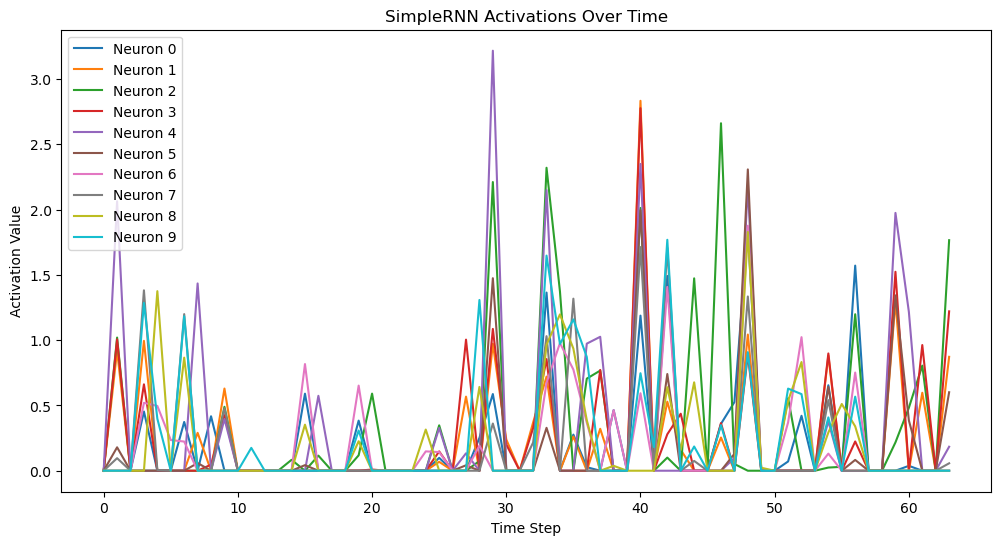

In [185]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Model

# Create a submodel that includes only the SimpleRNN layer
rnn_activation_model = Model(inputs=rnn_model.input, outputs=rnn_model.get_layer('simple_rnn_4').output)

# Assuming X_test_rnn is the reshaped input for the RNN branch
activations = rnn_activation_model.predict(X_test_rnn)

# Transpose the activations if needed
if len(activations.shape) == 3:
    activations = activations[:, :, 0]

# Limit the number of neurons for better visualization
num_neurons_to_plot = min(10, activations.shape[0])

# Plot the activations using a line plot
plt.figure(figsize=(12, 6))
time_steps = np.arange(activations.shape[1])
for neuron_idx in range(num_neurons_to_plot):
    plt.plot(time_steps, activations[neuron_idx, :], label=f'Neuron {neuron_idx}')

plt.title('SimpleRNN Activations Over Time')
plt.xlabel('Time Step')
plt.ylabel('Activation Value')
plt.legend()
plt.show()


In [172]:
dense_layer_weights = rnn_model.layers[-1].get_weights()[0]  # Assuming the first dense layer is the one with 128 units
importance_scores = np.sum(np.abs(dense_layer_weights), axis=1)
normalized_importance_scores = importance_scores / np.sum(importance_scores)
normalized_importance_scores

array([0.05487471, 0.00101397, 0.03262674, 0.04667056, 0.02028164,
       0.00244763, 0.04847123, 0.03954658, 0.02902122, 0.03084014,
       0.04322483, 0.05865216, 0.02534899, 0.0332882 , 0.03557511,
       0.02508298, 0.05048925, 0.05890919, 0.03079565, 0.01617016,
       0.04238598, 0.01102621, 0.05495369, 0.01476128, 0.03322951,
       0.04941975, 0.02968258, 0.00161263, 0.021416  , 0.02751188,
       0.01938675, 0.01128276], dtype=float32)

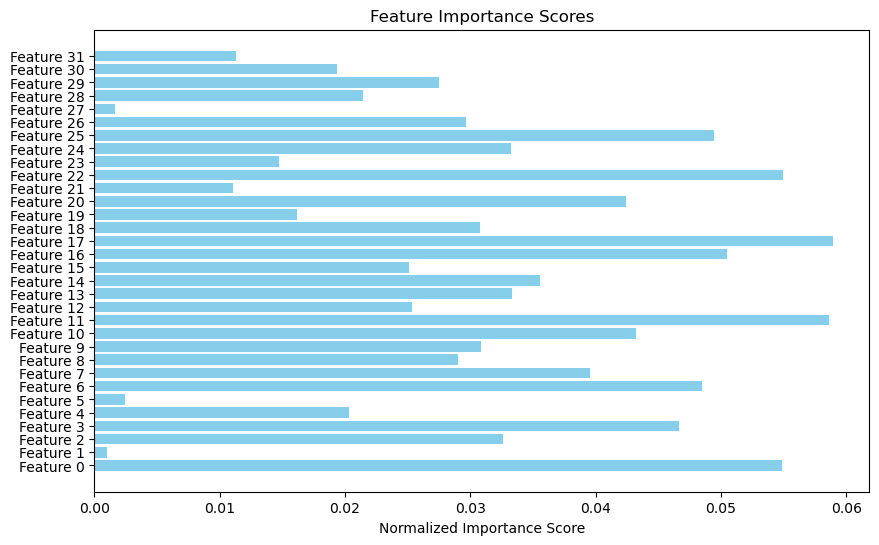

In [173]:
import matplotlib.pyplot as plt

# Assuming you've calculated normalized_importance_scores as described earlier

# Get the feature names (adjust this based on your data)
feature_names = [f'Feature {i}' for i in range(len(normalized_importance_scores))]

# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(feature_names, normalized_importance_scores, color='skyblue')
plt.xlabel('Normalized Importance Score')
plt.title('Feature Importance Scores')
plt.show()


In [162]:
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
# Make predictions
y_pred = rnn_model.predict(X_test_reshaped)
# Assuming binary classification
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

# Assuming y_test is available
rnn_accuracy = accuracy_score(y_test, y_pred_binary)
rnn_precision = precision_score(y_test, y_pred_binary)
rnn_recall = recall_score(y_test, y_pred_binary)
rnn_f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {rnn_accuracy:.4f}")
print(f"Precision: {rnn_precision:.4f}")
print(f"Recall: {rnn_recall:.4f}")
print(f"F1 Score: {rnn_f1:.4f}")


241/241 [==============================] - 1s 3ms/step
Accuracy: 0.9105
Precision: 0.8959
Recall: 0.9363
F1 Score: 0.9156


In [164]:
x_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
evaluation = rnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation[1]}")

241/241 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.9105
Test Accuracy: 0.9105331301689148


In [165]:
rnn_model.save('rnn_full_model.h5')

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [144]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, LSTM, concatenate

# Assuming X_train has the shape (number of samples, 12, 1)
input_shape = (X_train.shape[1], 1)

# Define branches for 1D CNN, RNN, and LSTM
cnn_branch = Sequential()
cnn_branch.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
cnn_branch.add(MaxPooling1D(pool_size=2))
cnn_branch.add(Conv1D(32, kernel_size=3, activation='relu'))
cnn_branch.add(MaxPooling1D(pool_size=2))
cnn_branch.add(Flatten())

rnn_branch = Sequential()
rnn_branch.add(SimpleRNN(64, activation='relu', input_shape=input_shape))

lstm_branch = Sequential()
lstm_branch.add(LSTM(64, activation='relu', input_shape=input_shape))

# Combine the branches
combined_model = concatenate([cnn_branch.output, rnn_branch.output, lstm_branch.output])

# Add dense layers for further processing
combined_model = Dense(128, activation='relu')(combined_model)
combined_model = Dense(64, activation='relu')(combined_model)

# Output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(combined_model)

# Create the final model
clr_model = Model(inputs=[cnn_branch.input, rnn_branch.input, lstm_branch.input], outputs=output_layer)

# Compile the model
clr_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

# Train the model
clr_model.fit([X_train_cnn, X_train_rnn, X_train_lstm], y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
768/768 [==============================] - 15s 13ms/step - loss: 5.1228 - accuracy: 0.7913 - val_loss: 1.3656 - val_accuracy: 0.8294
Epoch 2/10
768/768 [==============================] - 9s 12ms/step - loss: 2.3363 - accuracy: 0.8172 - val_loss: 3.0107 - val_accuracy: 0.8473
Epoch 3/10
768/768 [==============================] - 9s 12ms/step - loss: 1.0807 - accuracy: 0.8502 - val_loss: 1.0027 - val_accuracy: 0.8662
Epoch 4/10
768/768 [==============================] - 9s 12ms/step - loss: 1.0893 - accuracy: 0.8463 - val_loss: 0.8266 - val_accuracy: 0.8420
Epoch 5/10
768/768 [==============================] - 9s 12ms/step - loss: 0.6730 - accuracy: 0.8576 - val_loss: 1.2008 - val_accuracy: 0.8086
Epoch 6/10
768/768 [==============================] - 9s 12ms/step - loss: 0.6622 - accuracy: 0.8568 - val_loss: 0.4026 - val_accuracy: 0.8879
Epoch 7/10
768/768 [==============================] - 9s 11ms/step - loss: 0.4791 - accuracy: 0.8637 - val_loss: 0.3966 - val_accuracy: 0.873

In [127]:
model.save('full_model.h5')

D:\Anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [147]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv1d_6_input (InputLayer  [(None, 12, 1)]              0         []                            
 )                                                                                                
                                                                                                  
 conv1d_6 (Conv1D)           (None, 10, 64)               256       ['conv1d_6_input[0][0]']      
                                                                                                  
 max_pooling1d_6 (MaxPoolin  (None, 5, 64)                0         ['conv1d_6[0][0]']            
 g1D)                                                                                             
                                                                                            

In [145]:
dense_layer_weights = model.layers[-3].get_weights()[0]  # Assuming the first dense layer is the one with 128 units
importance_scores = np.sum(np.abs(dense_layer_weights), axis=1)
normalized_importance_scores = importance_scores / np.sum(importance_scores)
normalized_importance_scores

array([0.00577189, 0.00556805, 0.00596343, 0.00625025, 0.00651591,
       0.00643873, 0.00540656, 0.00599314, 0.0055783 , 0.00600811,
       0.00719286, 0.00566108, 0.0059333 , 0.00619483, 0.00605857,
       0.00544276, 0.00577396, 0.00661773, 0.0059305 , 0.00561359,
       0.00634278, 0.00541364, 0.00582591, 0.00603333, 0.00715489,
       0.00605383, 0.00602001, 0.00606921, 0.00557616, 0.00661616,
       0.00537348, 0.00604264, 0.0060769 , 0.00615533, 0.00578954,
       0.00669144, 0.00596016, 0.0068958 , 0.00661305, 0.00771879,
       0.00578009, 0.00666302, 0.00590058, 0.00681546, 0.00495091,
       0.01023088, 0.0072221 , 0.00557999, 0.00655039, 0.00676294,
       0.00542702, 0.00583337, 0.00761119, 0.00650177, 0.00647154,
       0.00630015, 0.00614614, 0.00678145, 0.00590748, 0.00596192,
       0.00697855, 0.00595365, 0.00685333, 0.0075201 , 0.0056337 ,
       0.00724833, 0.00609291, 0.00569925, 0.00646438, 0.00817437,
       0.00700295, 0.00687959, 0.0066615 , 0.00689248, 0.00604

In [146]:
len(normalized_importance_scores)

160

In [75]:
# Assuming you have X_test_cnn, X_test_rnn, and X_test_lstm for each input branch
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Evaluate the model
evaluation = model.evaluate([X_test_cnn, X_test_rnn, X_test_lstm], y_test)

# Print the accuracy
print(f"Test Accuracy: {evaluation[1]}")


241/241 [==============================] - 1s 6ms/step - loss: 0.2591 - accuracy: 0.9060
Test Accuracy: 0.9059817790985107


In [130]:
# Make predictions
y_pred = model.predict([X_test_cnn, X_test_rnn, X_test_lstm])
# Assuming binary classification
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test is available
en_accuracy = accuracy_score(y_test, y_pred_binary)
en_precision = precision_score(y_test, y_pred_binary)
en_recall = recall_score(y_test, y_pred_binary)
en_f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {en_accuracy:.4f}")
print(f"Precision: {en_precision:.4f}")
print(f"Recall: {en_recall:.4f}")
print(f"F1 Score: {en_f1:.4f}")


241/241 [==============================] - 1s 6ms/step
Accuracy: 0.8597
Precision: 0.9220
Recall: 0.7969
F1 Score: 0.8549


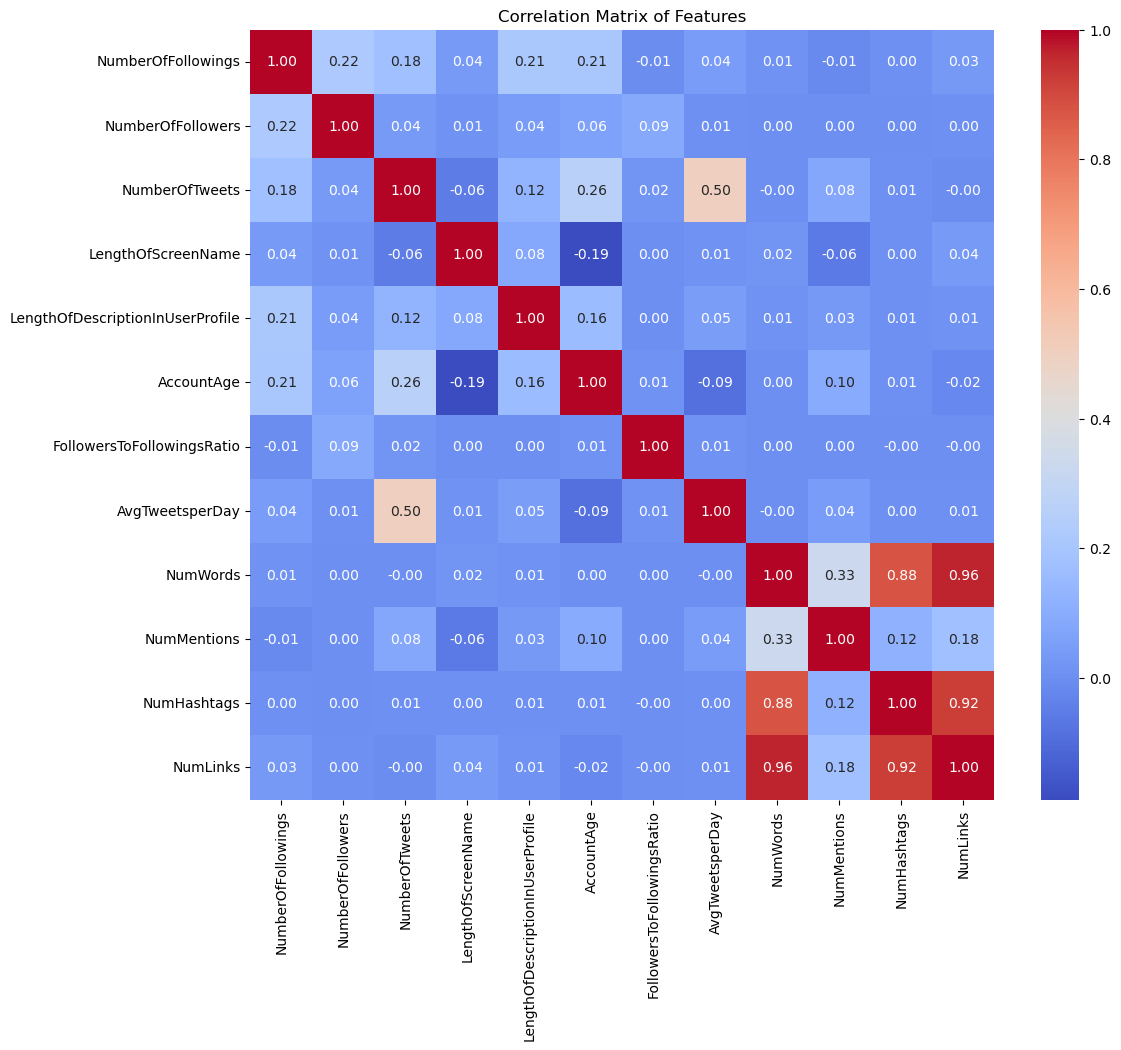

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# If your DataFrame has a target variable, you may want to exclude it from the correlation matrix
# For example, if the target variable is named 'target':
# features_df = df.drop(columns=['target'])

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


241/241 [==============================] - 2s 5ms/step


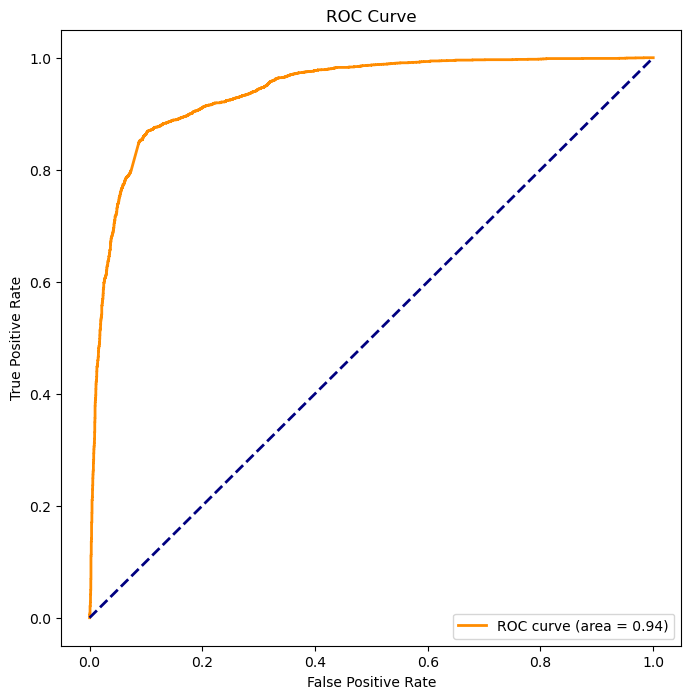

In [150]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# Make predictions
y_pred = model.predict([X_test_cnn, X_test_rnn, X_test_lstm])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


241/241 [==============================] - 1s 4ms/step


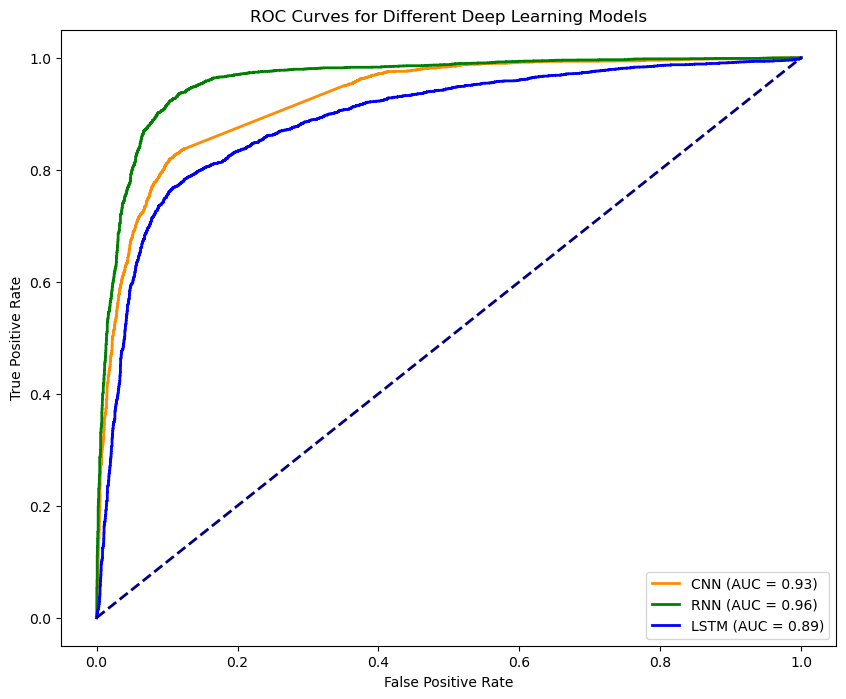

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have y_test and X_test for evaluation

# Assuming X_test has the same structure as X_train (reshaped for each branch)
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Make predictions for each branch
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Compute ROC curve and ROC area for each branch
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_pred_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot ROC curves for all three branches
plt.figure(figsize=(10, 8))
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'CNN (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_rnn, tpr_rnn, color='green', lw=2, label=f'RNN (AUC = {roc_auc_rnn:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='blue', lw=2, label=f'LSTM (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Deep Learning Models')
plt.legend(loc='lower right')
plt.show()
